<a href="https://colab.research.google.com/github/k-vinamr/rera_construction_pred/blob/main/10_floor_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
data = pd.read_excel('10_floor_data.xlsx')

In [3]:
data.head()

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Unnamed: 9,...,10th floor Columns casting,10th Floor slab casting,Brick work of 8th to 10th Floor,"Electrical concealed, PVC Fitting, plastering at 6th-9th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,other work
0,GALAXY CONSTRUCTION AND DEVELOPERS,Residential/Group Housing,2020-05-18,2020-07-31,3772.48,1132.90,10,MAHARASHTRA,74,NaN,...,0.779579,1.319287,2.158833,3.298217,4.797407,5.397083,5.397083,4.497569,5.397083,1.799028
1,M K PATIL CONSTRUCTIONS,Residential/Group Housing,2018-02-15,2018-05-31,5596.33,2677.00,10,MAHARASHTRA,105,NaN,...,1.106159,1.871961,3.063209,4.679903,6.807131,7.658023,7.658023,6.381686,7.658023,2.552674
2,SHAH PATEL & CO,Residential/Group Housing,2021-09-09,2021-12-30,823.04,775.50,10,MAHARASHTRA,112,NaN,...,1.179903,1.996759,3.267423,4.991896,7.260940,8.168558,8.168558,6.807131,8.168558,2.722853
3,RNA Builders (NG),Residential/Group Housing,2021-09-09,2021-12-30,1934.00,1193.00,10,MAHARASHTRA,112,NaN,...,1.179903,1.996759,3.267423,4.991896,7.260940,8.168558,8.168558,6.807131,8.168558,2.722853
4,Shree Ramkrishn Enterprises,Residential/Group Housing,2021-09-09,2021-12-30,2197.21,3590.24,10,MAHARASHTRA,112,NaN,...,1.179903,1.996759,3.267423,4.991896,7.260940,8.168558,8.168558,6.807131,8.168558,2.722853


In [4]:
data.describe()

,total_built_up_area_saleable_area,total_area_of_project,floor,total_days,Unnamed: 9,Cleaning & survey,"Excavation,leveling & P.C.C for Basement B1","Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring",Slab of B (bottom),Ground Floor slab casting,...,10th floor Columns casting,10th Floor slab casting,Brick work of 8th to 10th Floor,"Electrical concealed, PVC Fitting, plastering at 6th-9th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,other work
count,410.000000,410.000000,410.0,410.000000,0.0,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,6836.423634,3869.737537,10.0,1042.563415,NaN,8.448650,25.345950,25.345950,12.672975,15.207570,...,10.983245,18.587030,30.415140,46.467575,67.589200,76.037850,76.037850,63.364875,76.037850,25.345950
std,9091.535499,8119.345729,0.0,594.074767,NaN,4.814220,14.442660,14.442660,7.221330,8.665596,...,6.258486,10.591284,17.331193,26.478211,38.513761,43.327981,43.327981,36.106651,43.327981,14.442660
min,138.800000,179.800000,10.0,74.000000,NaN,0.599676,1.799028,1.799028,0.899514,1.079417,...,0.779579,1.319287,2.158833,3.298217,4.797407,5.397083,5.397083,4.497569,5.397083,1.799028
25%,1612.140000,780.650000,10.0,636.000000,NaN,5.153971,15.461912,15.461912,7.730956,9.277147,...,6.700162,11.338736,18.554295,28.346840,41.231767,46.385737,46.385737,38.654781,46.385737,15.461912
50%,3322.910000,1591.745000,10.0,967.500000,NaN,7.840357,23.521070,23.521070,11.760535,14.112642,...,10.192464,17.248784,28.225284,43.121961,62.722853,70.563209,70.563209,58.802674,70.563209,23.521070
75%,7501.295000,3792.000000,10.0,1401.000000,NaN,11.353323,34.059968,34.059968,17.029984,20.435981,...,14.759319,24.977310,40.871961,62.443274,90.826580,102.179903,102.179903,85.149919,102.179903,34.059968
max,49942.430000,118960.520000,10.0,3640.000000,NaN,29.497569,88.492707,88.492707,44.246353,53.095624,...,38.346840,64.894652,106.191248,162.236629,235.980551,265.478120,265.478120,221.231767,265.478120,88.492707


In [5]:
# Converting date columns to datetime objects
data['actual_commencement_date'] = pd.to_datetime(data['actual_commencement_date'], format='%d-%m-%Y', errors='coerce')
data['estimated_finish_date'] = pd.to_datetime(data['estimated_finish_date'], format='%d-%m-%Y', errors='coerce')


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 59 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   organisation_name                                                          410 non-null    object        
 1   project_category                                                           410 non-null    object        
 2   actual_commencement_date                                                   410 non-null    datetime64[ns]
 3   estimated_finish_date                                                      410 non-null    datetime64[ns]
 4   total_built_up_area_saleable_area                                          410 non-null    float64       
 5   total_area_of_project                                                      410 non-null    float64       
 6   fl

In [7]:
current_date = datetime.now()


In [8]:
data['duration_since_commencement'] = (current_date - data['actual_commencement_date']).dt.days
data['remaining_duration'] = (data['estimated_finish_date'] - current_date).dt.days
data['progress_ratio'] = data['duration_since_commencement'] / data['total_days']

In [9]:
# Define a function to determine the project status
def determine_status(row):
    if current_date > row['estimated_finish_date']:
        return 'completed'
    elif current_date >= row['actual_commencement_date']:
        return 'running'
    else:
        return 'upcoming'

# Apply the function to create the 'Status' column
data['current_stage'] = data.apply(determine_status, axis=1)

# Print the DataFrame with the 'Status' column
data


,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Unnamed: 9,...,Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,other work,duration_since_commencement,remaining_duration,progress_ratio,current_stage
0,GALAXY CONSTRUCTION AND DEVELOPERS,Residential/Group Housing,2020-05-18,2020-07-31,3772.48,1132.90,10,MAHARASHTRA,74,NaN,...,4.797407,5.397083,5.397083,4.497569,5.397083,1.799028,1268,-1195,17.135135,completed
1,M K PATIL CONSTRUCTIONS,Residential/Group Housing,2018-02-15,2018-05-31,5596.33,2677.00,10,MAHARASHTRA,105,NaN,...,6.807131,7.658023,7.658023,6.381686,7.658023,2.552674,2091,-1987,19.914286,completed
2,SHAH PATEL & CO,Residential/Group Housing,2021-09-09,2021-12-30,823.04,775.50,10,MAHARASHTRA,112,NaN,...,7.260940,8.168558,8.168558,6.807131,8.168558,2.722853,789,-678,7.044643,completed
3,RNA Builders (NG),Residential/Group Housing,2021-09-09,2021-12-30,1934.00,1193.00,10,MAHARASHTRA,112,NaN,...,7.260940,8.168558,8.168558,6.807131,8.168558,2.722853,789,-678,7.044643,completed
4,Shree Ramkrishn Enterprises,Residential/Group Housing,2021-09-09,2021-12-30,2197.21,3590.24,10,MAHARASHTRA,112,NaN,...,7.260940,8.168558,8.168558,6.807131,8.168558,2.722853,789,-678,7.044643,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,AADINATH BUILDERS AND DEVELOPERS,Residential/Group Housing,2019-10-30,2026-12-30,18876.93,12800.00,10,MAHARASHTRA,2618,NaN,...,169.724473,190.940032,190.940032,159.116694,190.940032,63.646677,1469,1148,0.561115,running
406,SUNIL BAPUSAHEB SHINDE,Residential/Group Housing,2019-09-12,2026-12-30,1031.32,516.00,10,MAHARASHTRA,2666,NaN,...,172.836305,194.440843,194.440843,162.034036,194.440843,64.813614,1517,1148,0.569017,running
407,BECHAR RAGHAVJI PATEL,Residential/Group Housing,2021-03-11,2028-06-30,9091.45,5643.30,10,MAHARASHTRA,2668,NaN,...,172.965964,194.586710,194.586710,162.155592,194.586710,64.862237,971,1696,0.363943,running
408,Ram Suresh Yadav,Residential/Group Housing,2012-04-01,2019-12-31,4632.15,1357.91,10,Rajasthan,2830,NaN,...,183.468395,206.401945,206.401945,172.001621,206.401945,68.800648,4237,-1408,1.497173,completed


In [10]:
# Assuming you have your data in a DataFrame named df
# If it's not, you can read your data from a CSV or any other source

# Define the bin edges
bin_width = 500
max_value = int(data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
data['area_bin'] = pd.cut(data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    data_min = grouped[feature].min()
    data_max = grouped[feature].max()
    data_mean = grouped[feature].mean()
    data_count = grouped[feature].count()
    result = pd.concat([data_min, data_max, data_mean, data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")

Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]         136.0  2367.0   825.941176     17
(500, 1000]      112.0  1589.0   801.793103     29
(1000, 1500]     120.0  2666.0   846.557692     52
(1500, 2000]     112.0  1524.0   679.684211     38
(2000, 2500]     112.0  2070.0   814.787879     33
...                ...     ...          ...    ...
(47500, 48000]     NaN     NaN          NaN      0
(48000, 48500]  1049.0  2057.0  1553.000000      2
(48500, 49000]     NaN     NaN          NaN      0
(49000, 49500]     NaN     NaN          NaN      0
(49500, 50000]  2484.0  2484.0  2484.000000      1

[100 rows x 4 columns]




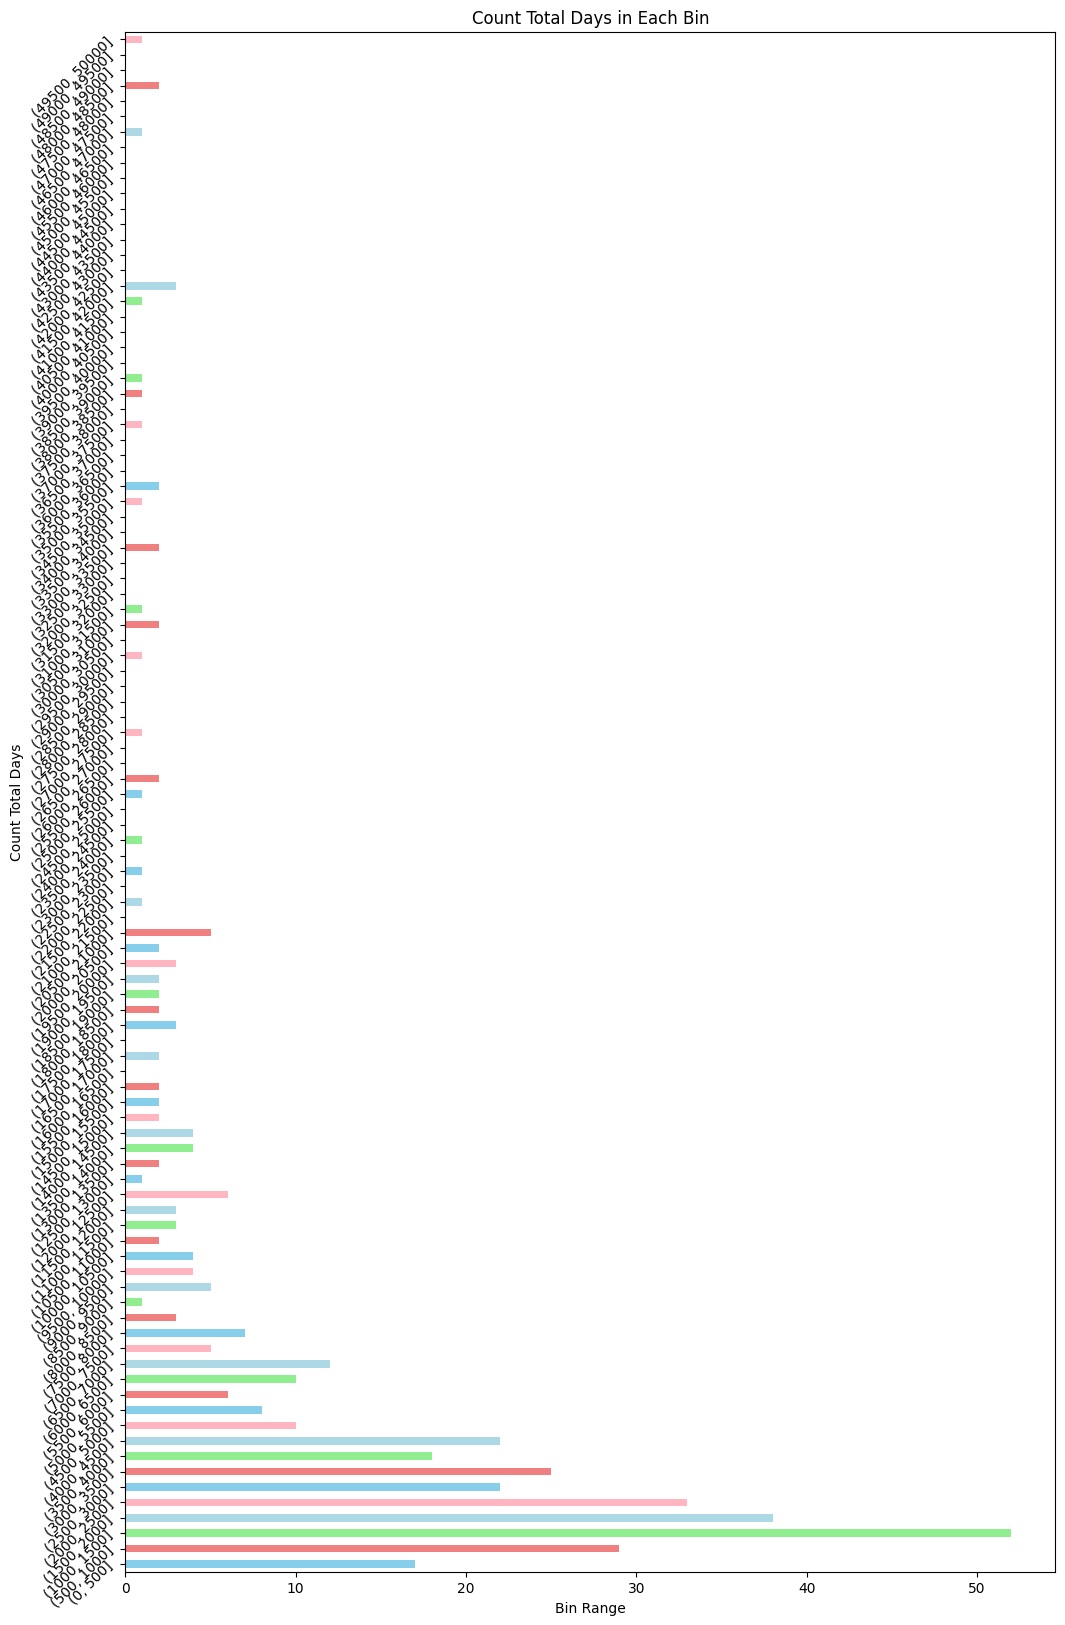

In [11]:
# Create a bar chart for the mean values
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'lightpink']
plt.figure(figsize=(12, 20))
data_count.plot(kind='barh', color=colors)
plt.xlabel('Bin Range')
plt.ylabel('Count Total Days')
plt.title('Count Total Days in Each Bin')
plt.yticks(range(len(data_count)), data_count.index, rotation=45)
plt.show()

In [12]:
# Filter the DataFrame based on the condition
filtered_data = data[data['total_built_up_area_saleable_area'] < 40000]

In [13]:
# Assuming you have your data in a DataFrame named df
# If it's not, you can read your data from a CSV or any other source

# Define the bin edges
bin_width = 500
max_value = int(filtered_data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
filtered_data['area_bin'] = pd.cut(filtered_data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = filtered_data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    filtered_data_min = grouped[feature].min()
    filtered_data_max = grouped[feature].max()
    filtered_data_mean = grouped[feature].mean()
    filtered_data_count = grouped[feature].count()
    result = pd.concat([filtered_data_min, filtered_data_max, filtered_data_mean, filtered_data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")

Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]         136.0  2367.0   825.941176     17
(500, 1000]      112.0  1589.0   801.793103     29
(1000, 1500]     120.0  2666.0   846.557692     52
(1500, 2000]     112.0  1524.0   679.684211     38
(2000, 2500]     112.0  2070.0   814.787879     33
...                ...     ...          ...    ...
(36500, 37000]     NaN     NaN          NaN      0
(37000, 37500]  1095.0  1095.0  1095.000000      1
(37500, 38000]     NaN     NaN          NaN      0
(38000, 38500]  1140.0  1140.0  1140.000000      1
(38500, 39000]  1202.0  1202.0  1202.000000      1

[78 rows x 4 columns]




<ipython-input-13-3ac3ef85beec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['area_bin'] = pd.cut(filtered_data['total_built_up_area_saleable_area'], bin_edges)


In [14]:
import pandas as pd
import random
from datetime import timedelta

# Assuming you have your filtered data in a DataFrame named filtered_df
# Ensure you have loaded the necessary libraries and data

# Define the number of data points you want to generate
desired_data_points = 10000  # Change this numbr as needed

# Create an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=filtered_data.columns)

# Copy the original data to the augmented DataFrame
augmented_data = augmented_data.append(filtered_data, ignore_index=True)

# Define the range for small changes (you can adjust this)
date_change_range = 7  # Number of days for date changes
area_change_range = 10  # Range for changing area

# Generate additional data points
while len(augmented_data) < desired_data_points:
    # Randomly select an existing row to modify
    index_to_modify = random.randint(0, len(filtered_data) - 1)
    row_to_modify = augmented_data.iloc[index_to_modify].copy()

    # Make small changes to the selected row
    row_to_modify['actual_commencement_date'] += timedelta(days=random.randint(-date_change_range, date_change_range))
    row_to_modify['estimated_finish_date'] += timedelta(days=random.randint(-date_change_range, date_change_range))
    row_to_modify['total_built_up_area_saleable_area'] += random.uniform(-area_change_range, area_change_range)
    row_to_modify['total_area_of_project'] += random.uniform(-area_change_range, area_change_range)

    # Add the modified row to the augmented DataFrame
    augmented_data = augmented_data.append(row_to_modify, ignore_index=True)

    # You may want to truncate the DataFrame to the desired number of data points
    augmented_data = augmented_data[:desired_data_points]

    # Now, augmented_data contains the augmented data with the specified changes


Streaming output truncated to the last 5000 lines.
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_

In [15]:
augmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 64 columns):
 #   Column                                                                     Non-Null Count  Dtype                 
---  ------                                                                     --------------  -----                 
 0   organisation_name                                                          10000 non-null  object                
 1   project_category                                                           10000 non-null  object                
 2   actual_commencement_date                                                   10000 non-null  datetime64[ns]        
 3   estimated_finish_date                                                      10000 non-null  datetime64[ns]        
 4   total_built_up_area_saleable_area                                          10000 non-null  float64               
 5   total_area_of_project                                 

In [16]:
# Define the bin edges
bin_width = 500
max_value = int(augmented_data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
augmented_data['area_bin'] = pd.cut(augmented_data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = augmented_data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    augmented_data_min = grouped[feature].min()
    augmented_data_max = grouped[feature].max()
    augmented_data_mean = grouped[feature].mean()
    augmented_data_count = grouped[feature].count()
    result = pd.concat([augmented_data_min, augmented_data_max, augmented_data_mean, augmented_data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")


Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]         136.0  2367.0   802.700935    428
(500, 1000]      112.0  1589.0   796.230053    752
(1000, 1500]     120.0  2666.0   873.147635   1226
(1500, 2000]     112.0  1524.0   705.922737    906
(2000, 2500]     112.0  2070.0   812.568720    844
...                ...     ...          ...    ...
(36500, 37000]     NaN     NaN          NaN      0
(37000, 37500]  1095.0  1095.0  1095.000000     26
(37500, 38000]     NaN     NaN          NaN      0
(38000, 38500]  1140.0  1140.0  1140.000000     30
(38500, 39000]  1202.0  1202.0  1202.000000     20

[78 rows x 4 columns]




In [18]:
augmented_data.to_csv('augmented_10_floor.csv', index=False)